# Kaggle Survey 2017

# 데이터 파일

5 개의 데이터 파일을 제공

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy import stats

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
question = pd.read_csv('data/schema.csv')
print(question.shape)

(290, 3)


In [4]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
# 선다형 객관식 문제에 대한 응답을 가져 옴
mcr = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
print(mcr.shape)

(16716, 228)


In [6]:
mcr.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mcr.dtypes

GenderSelect                       object
Country                            object
Age                               float64
EmploymentStatus                   object
StudentStatus                      object
                                   ...   
JobFactorRemote                    object
JobFactorIndustry                  object
JobFactorLeaderReputation          object
JobFactorDiversity                 object
JobFactorPublishingOpportunity     object
Length: 228, dtype: object

In [8]:
mcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


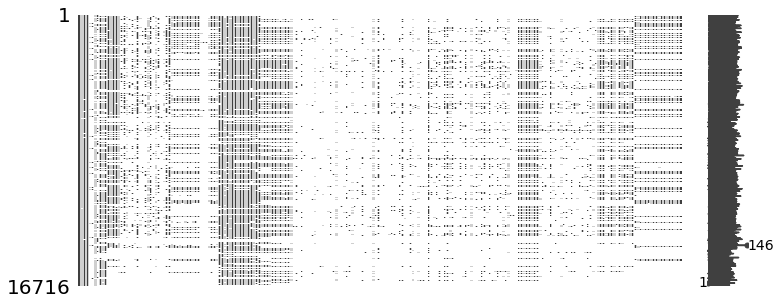

In [9]:
msno.matrix(mcr, figsize=(12, 5))

* 16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

In [10]:
mcr.isnull().sum()

GenderSelect                         95
Country                             121
Age                                 331
EmploymentStatus                      0
StudentStatus                     15436
                                  ...  
JobFactorRemote                   13292
JobFactorIndustry                 13307
JobFactorLeaderReputation         13315
JobFactorDiversity                13306
JobFactorPublishingOpportunity    13292
Length: 228, dtype: int64

# Survey Statistics

## -Sex

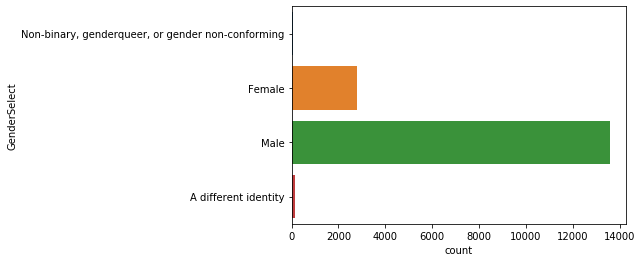

In [11]:
sns.countplot(data=mcr, y="GenderSelect")

* 남성의 비중이 여성보다 훨씬 크다

## -Country

In [12]:
# mcr_country = pd.DataFrame(mcr["Country"].value_counts())
# mcr_country['국가'] = mcr_country.index
# mcr_country.columns = ["응답수", "국가"]
# mcr_country = mcr_country.reset_index().drop('index', axis=1)
# mcr_country.head(18)

In [13]:
mcr_country_count = pd.DataFrame(mcr['Country'].value_counts())
mcr_country_percent = pd.DataFrame(mcr['Country'].value_counts(normalize=True))
mcr_country = mcr_country_count.merge(mcr_country_percent, left_index=True, right_index=True)
mcr_country.columns = ["응답수", "비율"]
mcr_country.head(18)

,응답수,비율
United States,4197,0.252908
India,2704,0.162941
Other,1023,0.061645
Russia,578,0.034830
United Kingdom,535,0.032239
People 's Republic of China,471,0.028382
Brazil,465,0.028020
Germany,460,0.027719
France,442,0.026635
Canada,440,0.026514


* 한국은 18위이다.

## -Age

In [14]:
mcr["Age"].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [15]:
print(mcr.shape)
mcr["Age"].isnull().sum()

(16716, 228)


331

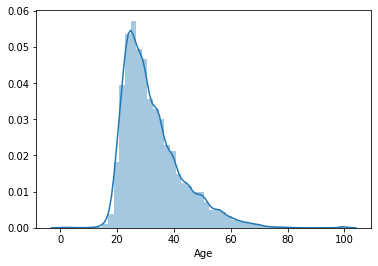

In [16]:
sns.distplot(mcr[mcr["Age"] > 0]["Age"])

* 나이는 평균 32세이고 null값이 331개가 있고 20대부터 급격하게 증가해서 30대가 가장 많다.

## -Education

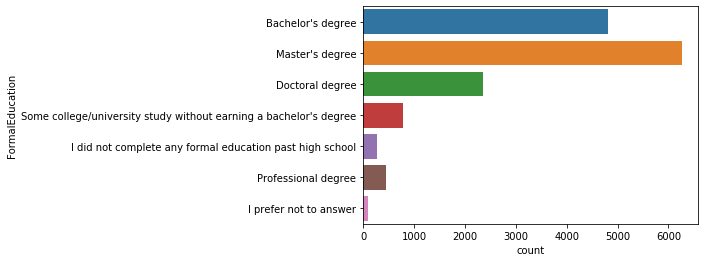

In [17]:
sns.countplot(data=mcr, y="FormalEducation")

* 석사학위가 학사학위보다 많다. 그 다음으로 박사학위가 뒤따르고 있다.

## -Major

In [18]:
mcr_major_count = pd.DataFrame(mcr['MajorSelect'].value_counts())
mcr_major_percent = pd.DataFrame(mcr['MajorSelect'].value_counts(normalize=True))
mcr_major = mcr_major_count.merge(mcr_major_percent, left_index=True, right_index=True)
mcr_major.columns = ["응답수", "비율"]
mcr_major.head(10)

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


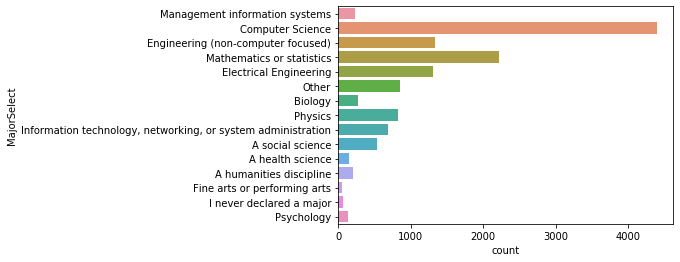

In [19]:
sns.countplot(data=mcr, y="MajorSelect")

* 전공 컴퓨터 전공이 33%, 수학 or 통계 16%, 공학 10% 순이다.

## -Employment Status

In [20]:
mcr_es_count = pd.DataFrame(mcr['EmploymentStatus'].value_counts())
mcr_es_percent = pd.DataFrame(mcr['EmploymentStatus'].value_counts(normalize=True))
mcr_es = mcr_es_count.merge(mcr_es_percent, left_index=True, right_index=True)
mcr_es.columns = ["응답수", "비율"]
mcr_es.head(10)

,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


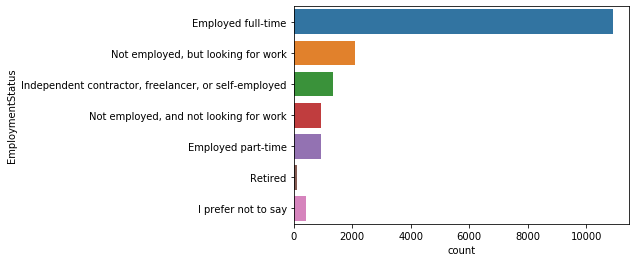

In [21]:
sns.countplot(data=mcr, y="EmploymentStatus")

* 풀타임이 65%, 구직자가 12% 순이다.

## -Programming Experience

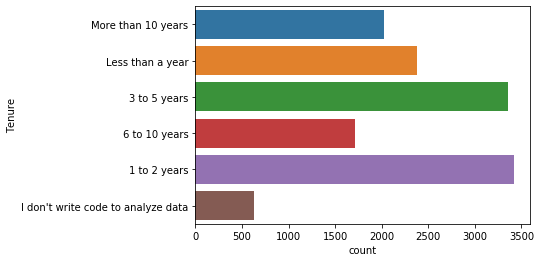

In [22]:
# Tenure 데이터사이언스 분야에서의 코딩 경험의 정도
sns.countplot(data=mcr, y="Tenure")

## -우리나라의 정보

In [23]:
# 우리나라 응답자 수
mcr_korea = mcr.loc[(mcr['Country'] == 'South Korea')]
print(mcr_korea.shape)

(194, 228)


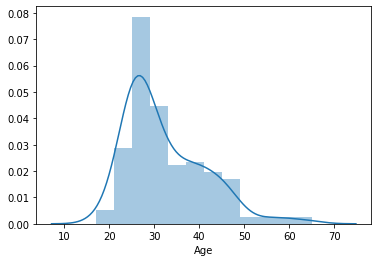

In [24]:
# 나이의 분포
sns.distplot(mcr_korea["Age"].dropna())

Male                    156
Female                   37
A different identity      1
Name: GenderSelect, dtype: int64


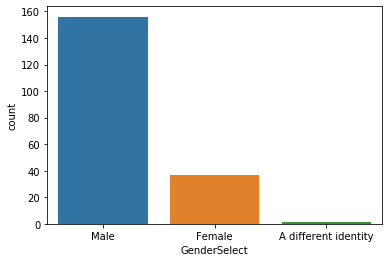

In [25]:
# 남여 성비
print(mcr_korea["GenderSelect"].value_counts())
sns.countplot(data=mcr_korea, x="GenderSelect")

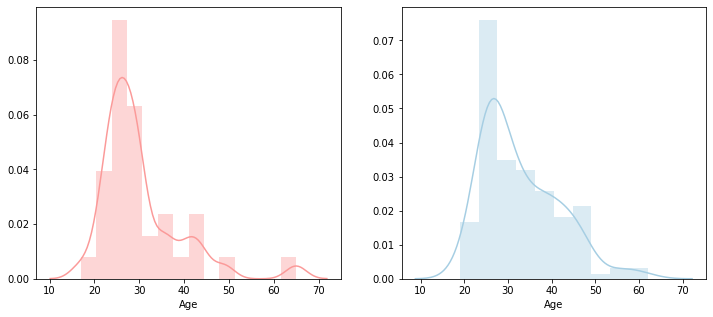

In [26]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)

sns.distplot(mcr_korea['Age'].loc[mcr_korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)

sns.distplot(mcr_korea['Age'].loc[mcr_korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)

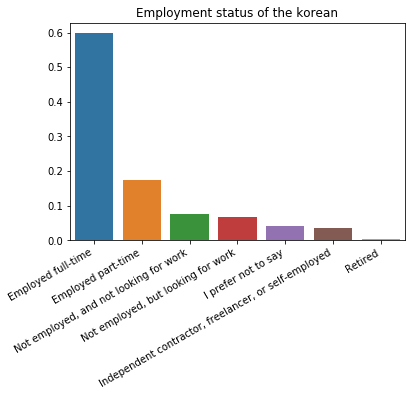

In [27]:
# 취업상태
sns.barplot(x=mcr_korea['EmploymentStatus'].unique(), y=mcr_korea['EmploymentStatus'].value_counts()/len(mcr_korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

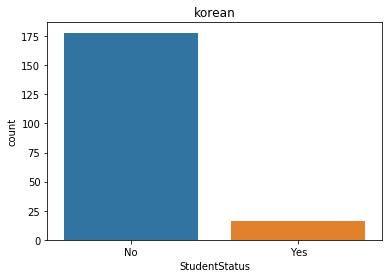

In [28]:
# 학생인지 아닌지?
mcr_korea['StudentStatus'] = mcr_korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=mcr_korea)
plt.title('korean')
plt.show()

## 자주 묻는 질문 FAQ

### -Q1. Python or R?

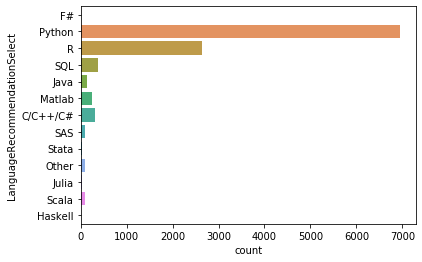

In [29]:
sns.countplot(data=mcr, y="LanguageRecommendationSelect")

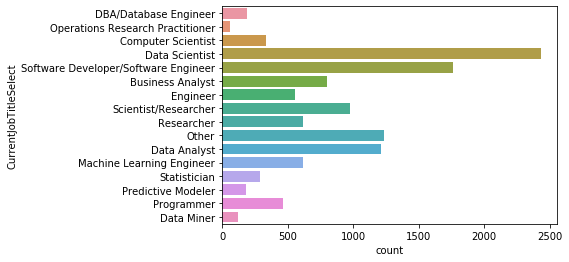

In [30]:
# 현재 하고 있는 일
sns.countplot(y=mcr['CurrentJobTitleSelect'])

In [31]:
# 현재 하고 있는 일에 대한 전체 응답수
print(mcr[mcr['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape)

(11830,)


(7158, 228)


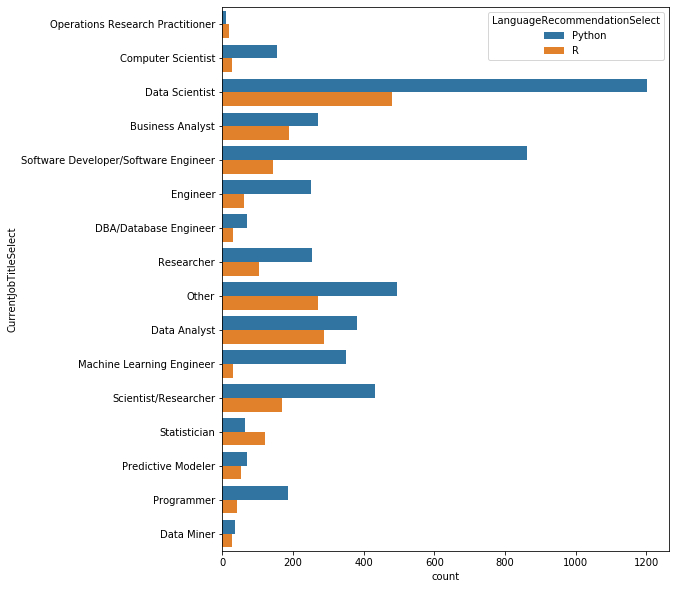

In [32]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
plt.figure(figsize=(8, 10))

CJTS = mcr['CurrentJobTitleSelect']
LRS = mcr['LanguageRecommendationSelect']

mcr_py_or_r = mcr[(CJTS.notnull()) & ((LRS == 'Python') | (LRS == 'R'))]

print(mcr_py_or_r.shape)

sns.countplot(data=mcr_py_or_r, y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect')

* 데이터사이언티스트은 파이썬을 사용하지만 R도 꽤 사용한다.

## Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은?

In [33]:
mcr_ml_tool_count = pd.DataFrame(mcr['MLToolNextYearSelect'].value_counts())
mcr_ml_tool_percent = pd.DataFrame(mcr['MLToolNextYearSelect'].value_counts(normalize=True))
mcr_ml_tool = mcr_ml_tool_count.merge(mcr_ml_tool_percent, left_index=True, right_index=True).head(20)
mcr_ml_tool.columns = ['응답 수', '비율']
mcr_ml_tool

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


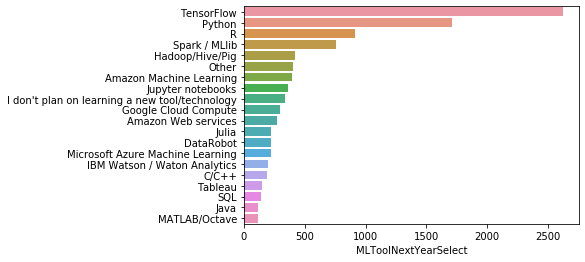

In [34]:
MLTNYS = mcr['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(x=MLTNYS, y=MLTNYS.index)

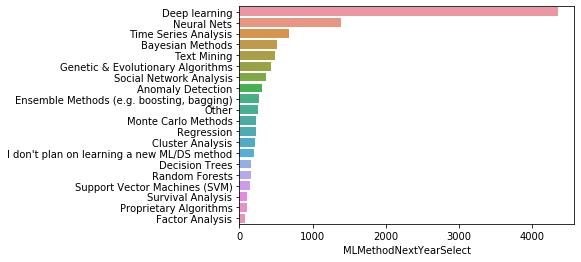

In [35]:
MLMNYS = mcr['MLMethodNextYearSelect'].value_counts().head(20)
sns.barplot(y=MLMNYS.index, x=MLMNYS)

## Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [36]:
mcr['LearningPlatformSelect'] = mcr['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcr.apply(lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

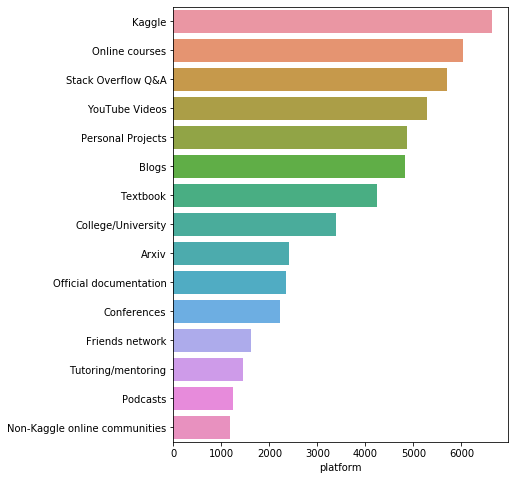

In [37]:
plt.figure(figsize=(6, 8))

LPS = s[s != 'nan'].value_counts().head(15)

sns.barplot(x=LPS, y=LPS.index)

In [38]:
# 설문내용과 누구에게 물어봤는지
qc = question.loc[question['Column'].str.contains('LearningCategory')]

print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [39]:
use_features = [x for x in mcr.columns if x.find('LearningPlatformUsefulness') != -1]
use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

In [40]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcr[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

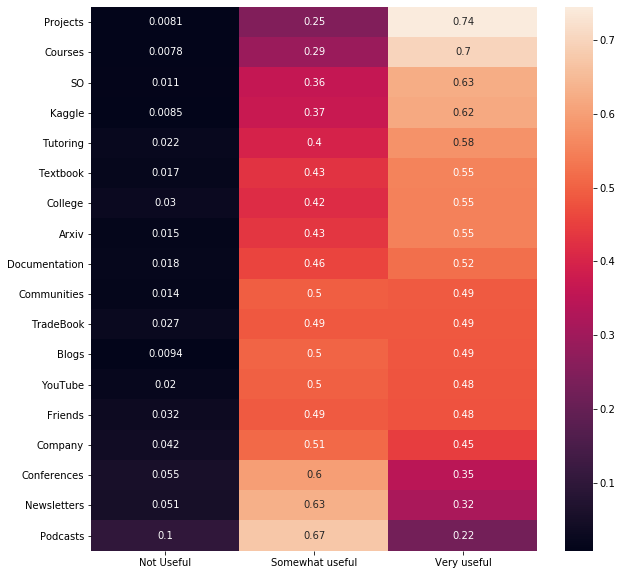

In [41]:
# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10, 10))

sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

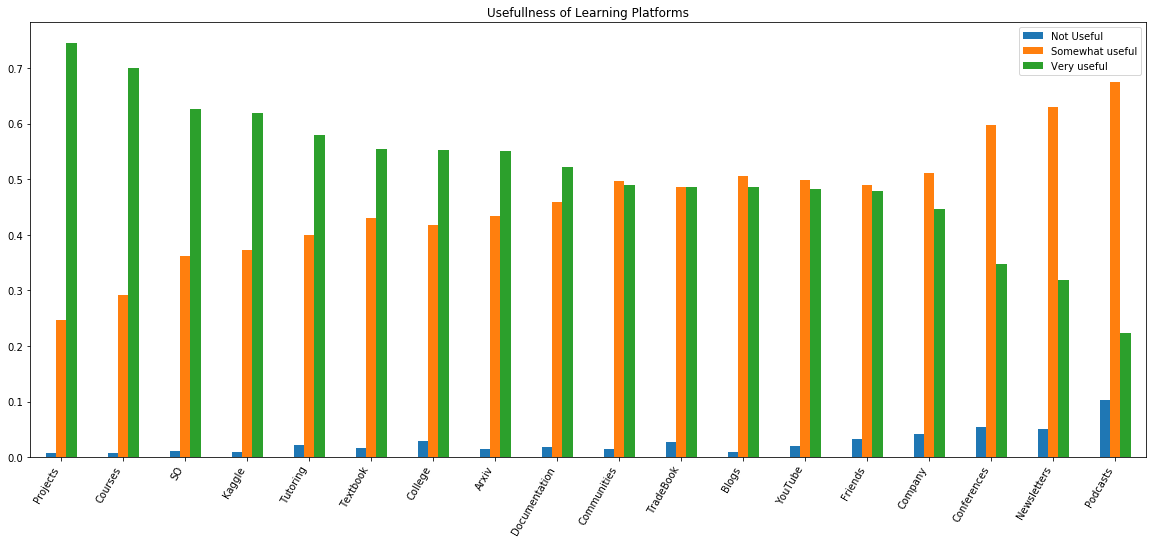

In [42]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20, 8), title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

In [43]:
cat_features = [x for x in mcr.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [44]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcr[feature].mean()

cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

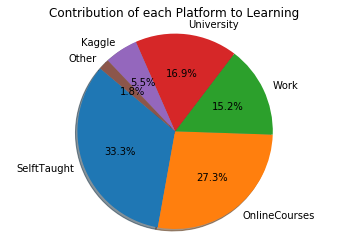

In [45]:
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

* 개인프로젝트가 가장 도움이 된다.

## Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [46]:
# 설문내용과 누구에게 물어봤는지
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]

print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [47]:
mcr[mcr['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [48]:
mcr['HardwarePersonalProjectsSelect'] = mcr['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = mcr.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [49]:
s = s[s != 'nan']

In [50]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
Laptop + Cloud service (AWS,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


## Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용 하는지?

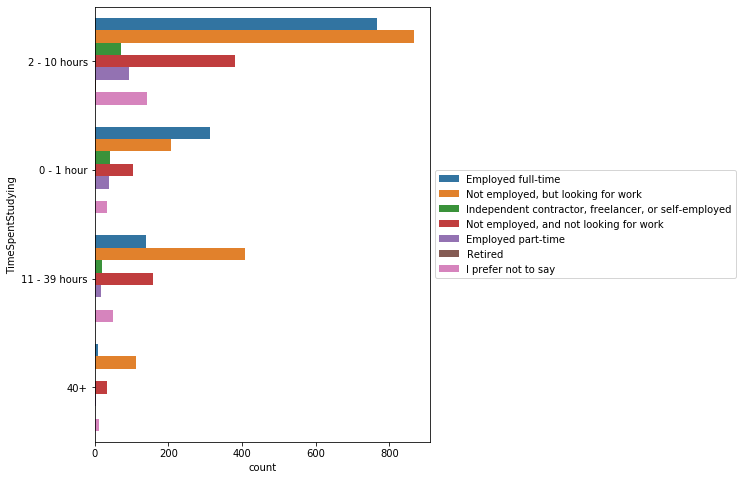

In [51]:
plt.figure(figsize=(6, 8))
sns.countplot(data=mcr, y='TimeSpentStudying', hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [52]:
full_time = mcr.loc[(mcr['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcr.loc[(mcr['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


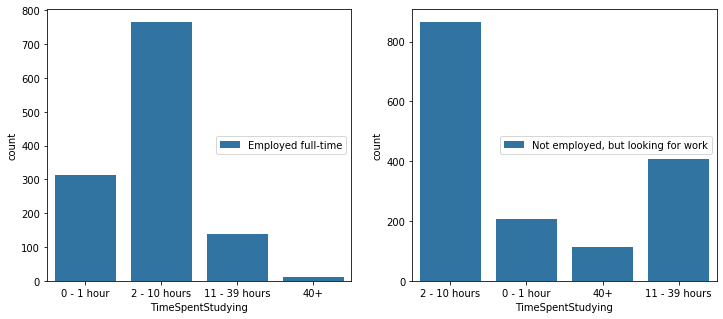

In [53]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12, 5)

sns.countplot(data=full_time, x='TimeSpentStudying', hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right', bbox_to_anchor=(1, 0.5))

sns.countplot(data=looking_for_job, x='TimeSpentStudying', hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right', bbox_to_anchor=(1, 0.5))

## Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [54]:
mcr['BlogsPodcastsNewslettersSelect'] = mcr['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcr['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [55]:
s = mcr.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'

In [56]:
s = s[s != 'nan'].value_counts().head(20)

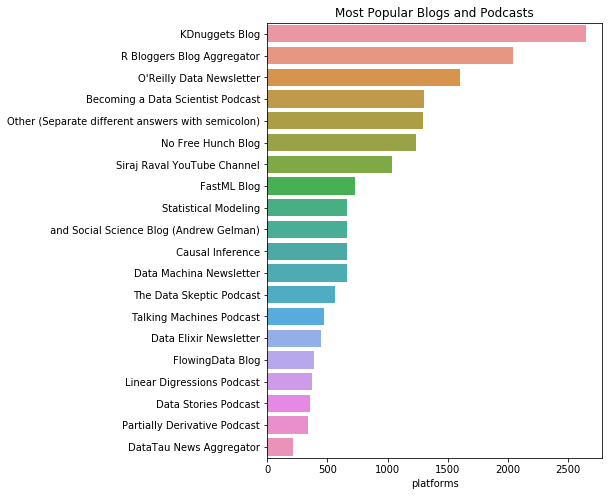

In [57]:
plt.figure(figsize=(6, 8))

plt.title("Most Popular Blogs and Podcasts")
sns.barplot(x=s, y=s.index)

In [58]:
mcr['CoursePlatformSelect'] = mcr['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
mcr['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [59]:
t = mcr.apply(lambda x: pd.Series(x['CoursePlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'

In [60]:
t = t[t != 'nan'].value_counts()

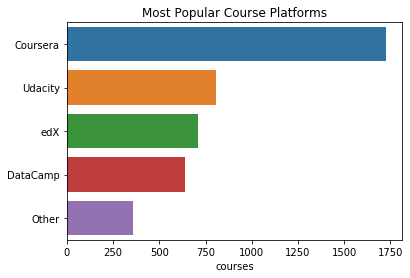

In [61]:
plt.title("Most Popular Course Platforms")
sns.barplot(x=t, y=t.index)

## Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [62]:
job_features = [x for x in mcr.columns if x.find('JobSkillImportance') != -1 
                and x.find('JobSkillImportanceOther') == -1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [63]:
jdf = {}
for feature in job_features:
    a = mcr[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [64]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


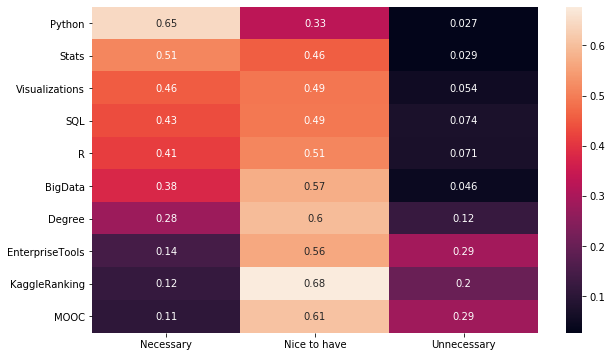

In [65]:
plt.figure(figsize=(10, 6))
sns.heatmap(jdf.sort_values("Necessary", ascending=False), annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

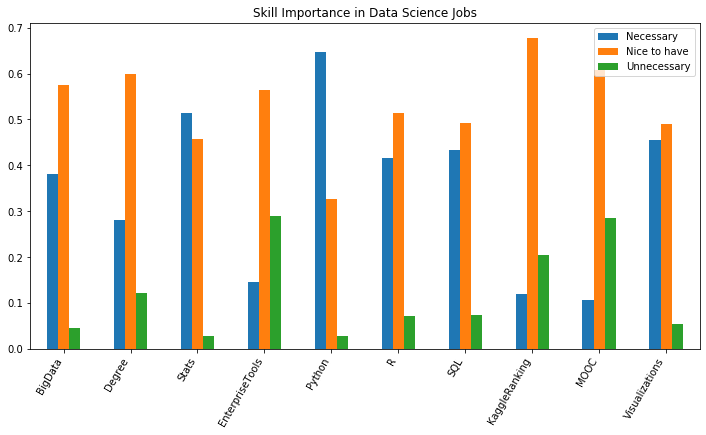

In [66]:
jdf.plot(kind='bar', figsize=(12,6), title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

## Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [67]:
mcr[mcr['CompensationAmount'].notnull()].shape

(5224, 228)

In [68]:
mcr['CompensationAmount'] = mcr['CompensationAmount'].str.replace(',','')
mcr['CompensationAmount'] = mcr['CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('data/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1, inplace=True)

salary = mcr[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()

salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']

salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [69]:
print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

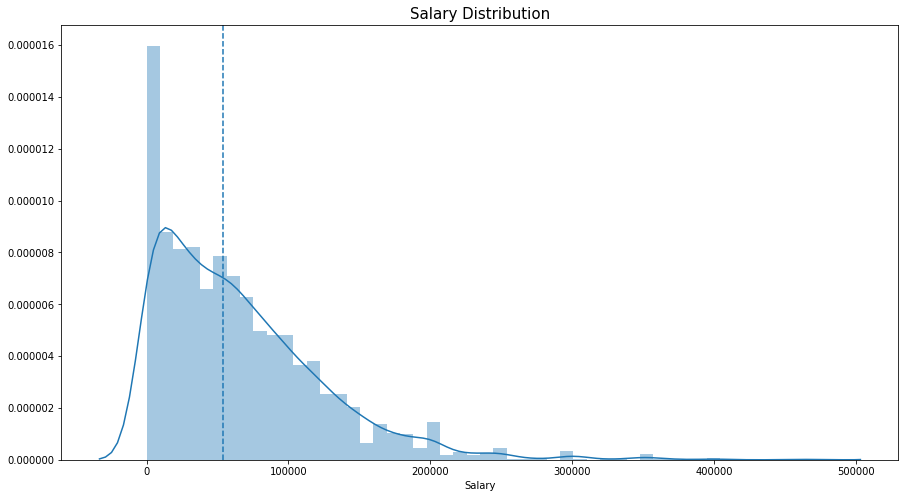

In [70]:
plt.subplots(figsize=(15, 8))

salary = salary[salary['Salary']<500000]

sns.distplot(salary['Salary'])

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

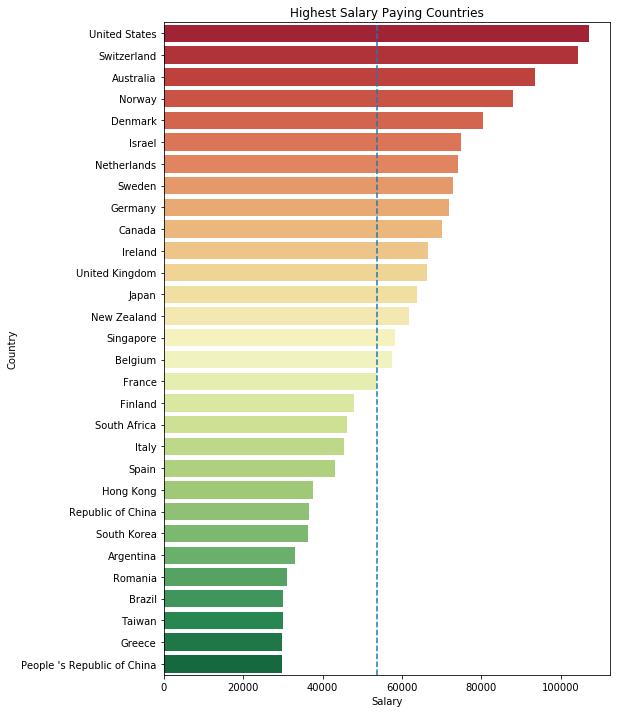

In [71]:
plt.subplots(figsize=(8, 12))

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()

sns.barplot('Salary', sal_coun.index, data=sal_coun, palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

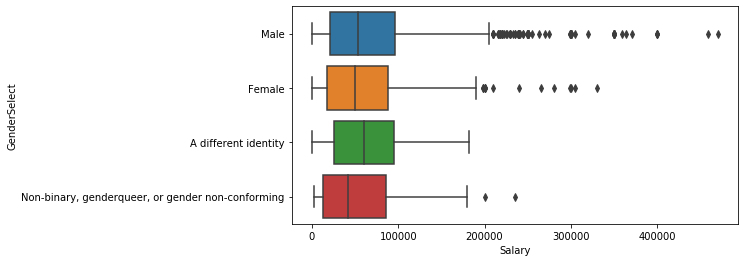

In [72]:
plt.subplots(figsize=(8, 4))

sns.boxplot(data=salary, x='Salary', y='GenderSelect')

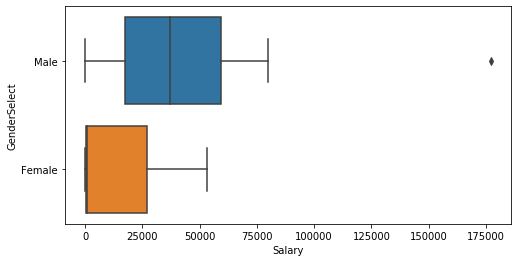

In [73]:
# 한국 급여 정보
plt.subplots(figsize=(8, 4))

salary_korea = salary.loc[(salary['Country']=='South Korea')]

sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [74]:
salary_korea.shape

(26, 8)

In [75]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [76]:
salary_korea_male = salary_korea[salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [77]:
salary_korea_male.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.0
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.0
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.0
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.0
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.0


## Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [78]:
mcr['PublicDatasetsSelect'] = mcr['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [79]:
q = mcr.apply(lambda x: pd.Series(x['PublicDatasetsSelect']), axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'

In [80]:
q = q[q != 'nan'].value_counts()

In [81]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


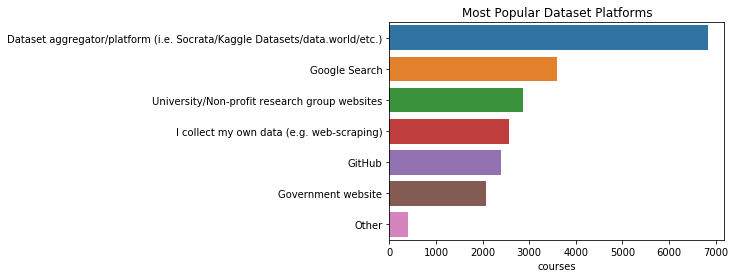

In [82]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(x=q, y=q.index)

In [83]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv('data/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)
print(ff.shape)

(16716, 62)


In [84]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]

print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [85]:
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning,20
Cleaning the data,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
-,9
Size,9


## Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [86]:
time_features = [x for x in mcr.columns if x.find('Time') != -1][4:10]
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64


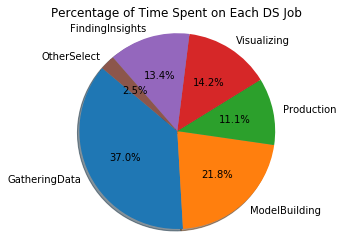

In [87]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcr[feature].mean()

tdf = pd.Series(tdf)
print(tdf)

plt.pie(tdf, labels=tdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

## Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?

In [88]:
qc = question.loc[question['Column'].str.contains('JobFactor')]

print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [89]:
job_factors = [x for x in mcr.columns if x.find('JobFactor') != -1]

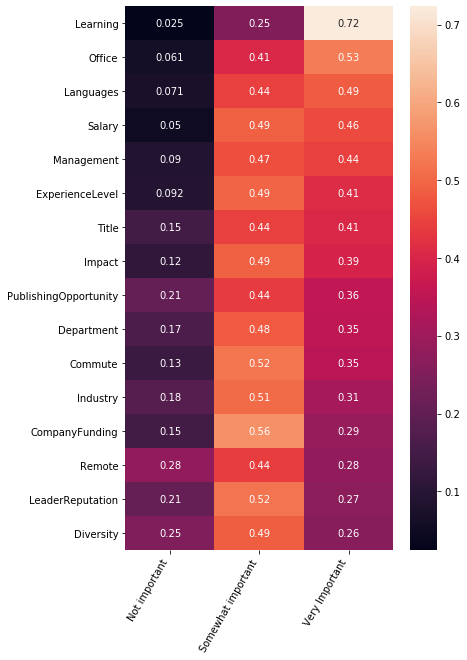

In [90]:
jfdf = {}
for feature in job_factors:
    a = mcr[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)

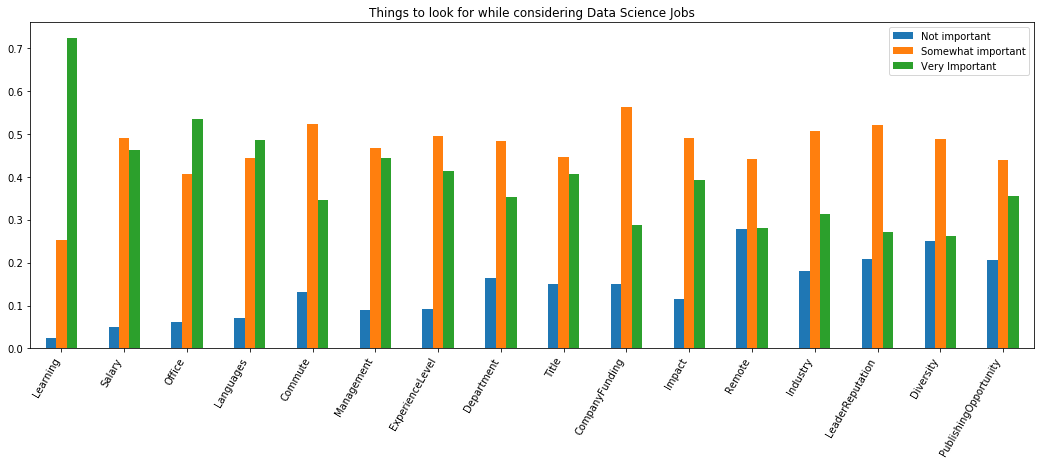

In [91]:
jfdf.plot(kind='bar', figsize=(18, 6), title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

## Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요? 

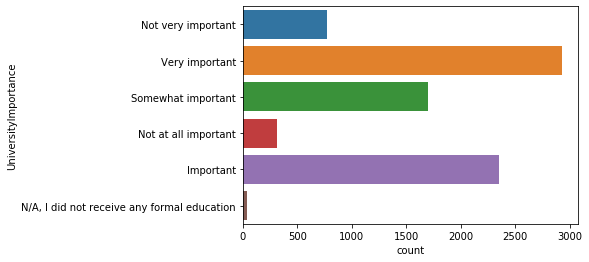

In [92]:
sns.countplot(data=mcr, y='UniversityImportance')

In [93]:
# import plotly.offline as py
# py.init_notebook_mode(connected=True)

# import plotly.figure_factory as fig_fact

# top_uni = mcq['UniversityImportance'].value_counts().head(5)
# top_uni_dist = []
# for uni in top_uni.index:
#     top_uni_dist.append(
#         mcq[(mcr['Age'].notnull()) & (mcr['UniversityImportance'] == uni)]['Age'])

# group_labels = top_uni.index

# fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)
# py.iplot(fig, filename='University Importance by Age')

## Q13. 어디에서 부터 데이터사이언스를 시작해야 할까요?

In [94]:
mcr[mcr['FirstTrainingSelect'].notnull()].shape

(14712, 228)

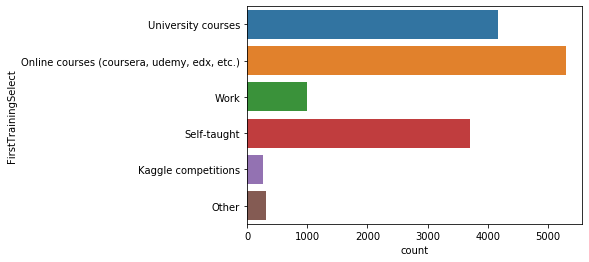

In [95]:
sns.countplot(data=mcr, y='FirstTrainingSelect')

## Q14. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

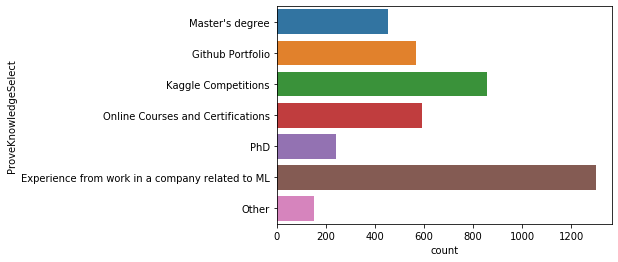

In [96]:
sns.countplot(data=mcr, y='ProveKnowledgeSelect')

## Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [97]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [98]:
mcr[mcr['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

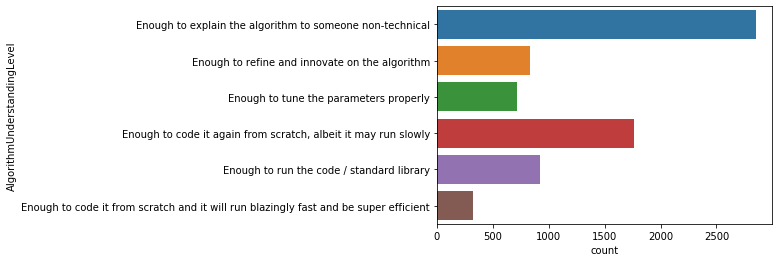

In [99]:
sns.countplot(data=mcr, y='AlgorithmUnderstandingLevel')

##  Q16. 어디에서 일을 찾아야 할까요?

In [100]:
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


Text(0.5, 1.0, 'Best Places to look for a Data Science Job')

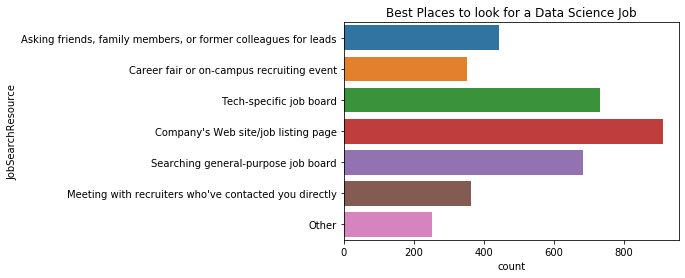

In [101]:
sns.countplot(data=mcr, y='JobSearchResource')
plt.title("Best Places to look for a Data Science Job")

Text(0.5, 1.0, 'Top Places to get Data Science Jobs')

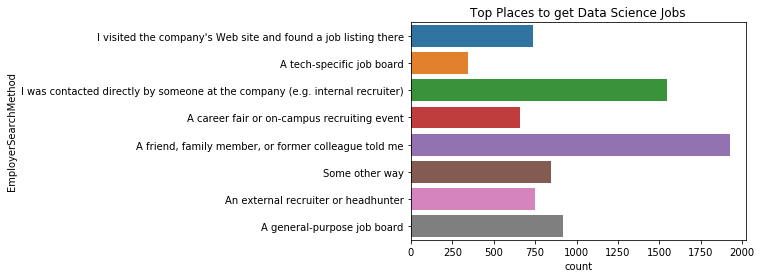

In [102]:
sns.countplot(data=mcr, y='EmployerSearchMethod')
plt.title("Top Places to get Data Science Jobs")

Text(0.5, 1.0, 'Best Places to look for a Data Science Job')

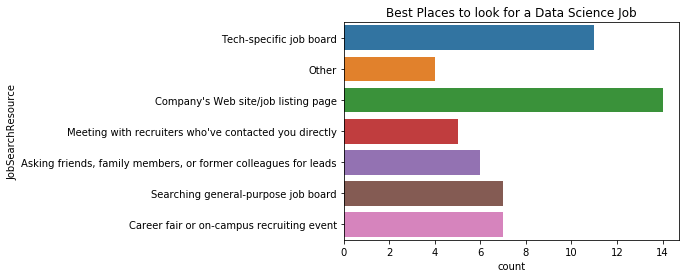

In [103]:
# 한국에서는 어떻게?
sns.countplot(data=mcr_korea, y='JobSearchResource')
plt.title("Best Places to look for a Data Science Job")

Text(0.5, 1.0, 'Top Places to get Data Science Jobs')

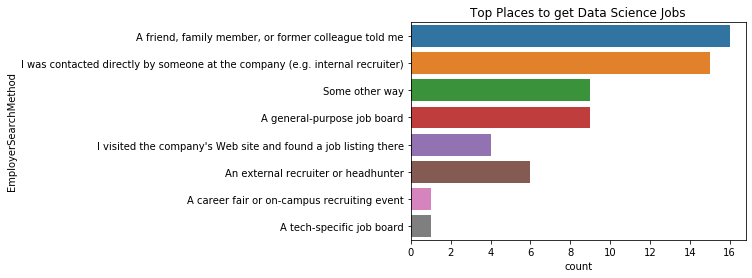

In [104]:
sns.countplot(data=mcr_korea, y='EmployerSearchMethod')
plt.title("Top Places to get Data Science Jobs")

## 결론
* 이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
* 하지만 Python과 R을 모두 사용하는 사람도 많다.
* 데이터 수집과 정제는 어려운 일이다.(공감)
* 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
* 내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.